In [5]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import pprint
from contextlib import redirect_stdout
from io import StringIO

In [6]:
#importing dataset
all_data = pd.read_csv(r'/Users/admin/Documents/ISDS 4070/PROJECT/Shakespeare_data.csv', sep=",")
all_data.tail(10)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
111386,111387,A Winters Tale,38.0,5.3.175,LEONTES,"What! look upon my brother: both your pardons,"
111387,111388,A Winters Tale,38.0,5.3.176,LEONTES,That e'er I put between your holy looks
111388,111389,A Winters Tale,38.0,5.3.177,LEONTES,"My ill suspicion. This is your son-in-law,"
111389,111390,A Winters Tale,38.0,5.3.178,LEONTES,"And son unto the king, who, heavens directing,"
111390,111391,A Winters Tale,38.0,5.3.179,LEONTES,"Is troth-plight to your daughter. Good Paulina,"
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.
111395,111396,A Winters Tale,38.0,NaN,LEONTES,Exeunt


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Dataline          111396 non-null  int64  
 1   Play              111396 non-null  object 
 2   PlayerLinenumber  111393 non-null  float64
 3   ActSceneLine      105153 non-null  object 
 4   Player            111389 non-null  object 
 5   PlayerLine        111396 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [8]:
#create base for wordcloud 
wrdcld = pd.Series(all_data['PlayerLine'].tolist()).astype(str)
wrdcld

0                                                     ACT I
1                              SCENE I. London. The palace.
2         Enter KING HENRY, LORD JOHN OF LANCASTER, the ...
3                    So shaken as we are, so wan with care,
4                Find we a time for frighted peace to pant,
                                ...                        
111391           Lead us from hence, where we may leisurely
111392                Each one demand an answer to his part
111393       Perform'd in this wide gap of time since first
111394               We were dissever'd: hastily lead away.
111395                                               Exeunt
Length: 111396, dtype: object

In [9]:
#number of lines included in the dataset
len(all_data)

111396

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
#check what stopwords are included in the default
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
#then we add some more words that were common in the ancient English used by Shakespeare
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['thy','thee','yet','shall','upon','go','come','though','ti','would','let','mine','u',"I'll",'look','one','may','thou','thus','give','done','like','take','tell','must','tis']
stop_words.extend(newStopWords)

In [13]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
#then we add some more word
len(stop_words)

205

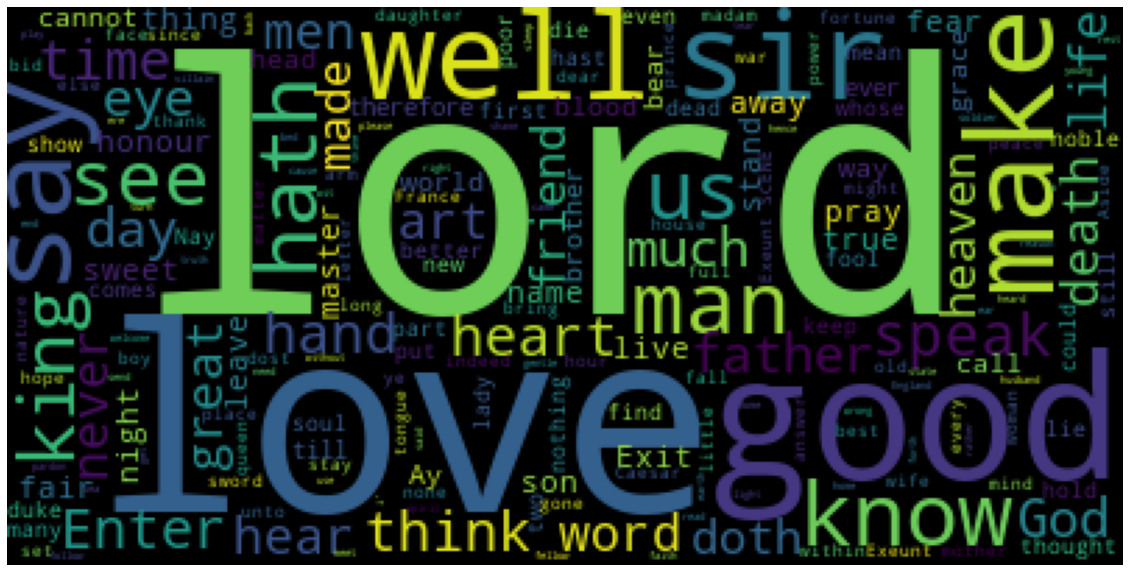

In [148]:
#create the actual wordcloud
from wordcloud import WordCloud
cloud = WordCloud(margin=0, max_font_size=125, stopwords=stop_words).generate(' '.join(wrdcld.astype(str)))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [15]:
plt.savefig("cloud.png", format = "png")

<Figure size 432x288 with 0 Axes>

In [16]:
#eliminate punctuation from column 
all_data["PlayerLine"] = all_data["PlayerLine"].str.replace('[^\w\s]','')

<ipython-input-16-8e7d2562c1ea>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data["PlayerLine"] = all_data["PlayerLine"].str.replace('[^\w\s]','')


In [17]:
#make a listed of all words in the plays
all_lines = list(all_data.PlayerLine)

In [18]:
#our list is made of strings containing the whole line
print(all_lines[2:8])

['Enter KING HENRY LORD JOHN OF LANCASTER the EARL of WESTMORELAND SIR WALTER BLUNT and others', 'So shaken as we are so wan with care', 'Find we a time for frighted peace to pant', 'And breathe shortwinded accents of new broils', 'To be commenced in strands afar remote', 'No more the thirsty entrance of this soil']


In [19]:
#we define a function that splits the lines into single words
from itertools import chain

def split_list_of_words(list_):
    return list(chain.from_iterable(map(str.split, list_)))

In [20]:
all_words = split_list_of_words(all_lines)

In [21]:
print(all_words[2:60])

['SCENE', 'I', 'London', 'The', 'palace', 'Enter', 'KING', 'HENRY', 'LORD', 'JOHN', 'OF', 'LANCASTER', 'the', 'EARL', 'of', 'WESTMORELAND', 'SIR', 'WALTER', 'BLUNT', 'and', 'others', 'So', 'shaken', 'as', 'we', 'are', 'so', 'wan', 'with', 'care', 'Find', 'we', 'a', 'time', 'for', 'frighted', 'peace', 'to', 'pant', 'And', 'breathe', 'shortwinded', 'accents', 'of', 'new', 'broils', 'To', 'be', 'commenced', 'in', 'strands', 'afar', 'remote', 'No', 'more', 'the', 'thirsty', 'entrance']


In [22]:
#filter out words with less than 2 characters 
my_words = [w.strip() for w in all_words if len(w)>2]
print(my_words[2:60])

['London', 'The', 'palace', 'Enter', 'KING', 'HENRY', 'LORD', 'JOHN', 'LANCASTER', 'the', 'EARL', 'WESTMORELAND', 'SIR', 'WALTER', 'BLUNT', 'and', 'others', 'shaken', 'are', 'wan', 'with', 'care', 'Find', 'time', 'for', 'frighted', 'peace', 'pant', 'And', 'breathe', 'shortwinded', 'accents', 'new', 'broils', 'commenced', 'strands', 'afar', 'remote', 'more', 'the', 'thirsty', 'entrance', 'this', 'soil', 'Shall', 'daub', 'her', 'lips', 'with', 'her', 'own', 'childrens', 'blood', 'Nor', 'more', 'shall', 'trenching', 'war']


In [23]:
#filter out stopwords 
filtered_words = [w.strip() for w in my_words if not w.lower() in stop_words]
print(filtered_words[2:60])

['London', 'palace', 'Enter', 'KING', 'HENRY', 'LORD', 'JOHN', 'LANCASTER', 'EARL', 'WESTMORELAND', 'SIR', 'WALTER', 'BLUNT', 'others', 'shaken', 'wan', 'care', 'Find', 'time', 'frighted', 'peace', 'pant', 'breathe', 'shortwinded', 'accents', 'new', 'broils', 'commenced', 'strands', 'afar', 'remote', 'thirsty', 'entrance', 'soil', 'daub', 'lips', 'childrens', 'blood', 'trenching', 'war', 'channel', 'fields', 'bruise', 'flowerets', 'armed', 'hoofs', 'hostile', 'paces', 'opposed', 'eyes', 'meteors', 'troubled', 'heaven', 'nature', 'substance', 'bred', 'lately', 'meet']


In [24]:
#transform everything in lower case and obtain a frequency distribution of the words
filtered_words = [element.lower() for element in filtered_words]
fd = nltk.FreqDist(filtered_words)

In [25]:
#sorted list of top words and how many times thay are used, not including stopwords 
fd.most_common(20)

[('good', 2706),
 ('lord', 2614),
 ('sir', 2441),
 ('well', 2413),
 ('enter', 2027),
 ('ill', 1932),
 ('love', 1876),
 ('hath', 1842),
 ('man', 1755),
 ('know', 1633),
 ('say', 1616),
 ('make', 1582),
 ('king', 1494),
 ('see', 1376),
 ('speak', 1133),
 ('exeunt', 1029),
 ('much', 1001),
 ('think', 997),
 ('never', 990),
 ('time', 971)]

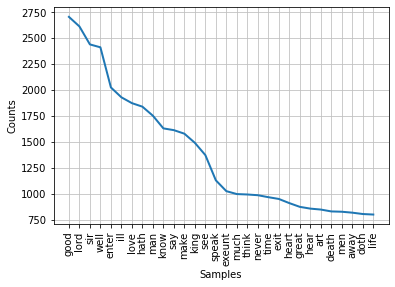

<Figure size 432x288 with 0 Axes>

In [26]:
#plot the frequency distribution
fd.plot(30,cumulative=False)
plt.show()
plt.savefig('greq_dist.png')

In [27]:
#replacing nan values in the player with other 
all_data['Player'].replace(np.nan, 'Other', inplace=True)
all_data.head(10)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,Other,ACT I
1,2,Henry IV,NaN,NaN,Other,SCENE I London The palace
2,3,Henry IV,NaN,NaN,Other,Enter KING HENRY LORD JOHN OF LANCASTER the EA...
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,So shaken as we are so wan with care
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,Find we a time for frighted peace to pant
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe shortwinded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
8,9,Henry IV,1.0,1.1.6,KING HENRY IV,Shall daub her lips with her own childrens blood
9,10,Henry IV,1.0,1.1.7,KING HENRY IV,Nor more shall trenching war channel her fields


In [28]:
all_data.groupby('Play').count()

,Dataline,PlayerLinenumber,ActSceneLine,Player,PlayerLine
Play,,,,,
A Comedy of Errors,2055,2055,1967,2055,2055
A Midsummer nights dream,2300,2300,2162,2300,2300
A Winters Tale,3489,3489,3364,3489,3489
Alls well that ends well,3083,3083,2925,3083,3083
Antony and Cleopatra,3862,3862,3565,3862,3862
As you like it,2822,2822,2677,2822,2822
Coriolanus,3992,3992,3768,3992,3992
Cymbeline,3958,3958,3757,3958,3958
Hamlet,4244,4244,4020,4244,4244


In [29]:
play_data = all_data.groupby('Play').count().sort_values(by='PlayerLine', ascending=False)['PlayerLine']
play_data

Play
Hamlet                      4244
Coriolanus                  3992
Cymbeline                   3958
Richard III                 3941
Antony and Cleopatra        3862
King Lear                   3766
Othello                     3762
Troilus and Cressida        3711
A Winters Tale              3489
Henry VIII                  3419
Henry V                     3395
Henry VI Part 2             3334
Romeo and Juliet            3313
Henry IV                    3205
Henry VI Part 3             3138
Alls well that ends well    3083
Measure for measure         2998
Loves Labours Lost          2986
Henry VI Part 1             2983
Richard II                  2937
Merry Wives of Windsor      2831
As you like it              2822
Taming of the Shrew         2806
Merchant of Venice          2802
Julius Caesar               2771
King John                   2766
Titus Andronicus            2726
Much Ado about nothing      2704
Timon of Athens             2662
Twelfth Night               2648
Peric

In [30]:
#creating dataframe with the number of lines for each play
play_data = play_data.to_frame()
play_data

,PlayerLine
Play,
Hamlet,4244
Coriolanus,3992
Cymbeline,3958
Richard III,3941
Antony and Cleopatra,3862
King Lear,3766
Othello,3762
Troilus and Cressida,3711
A Winters Tale,3489


In [31]:
play_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Hamlet to A Comedy of Errors
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PlayerLine  36 non-null     int64
dtypes: int64(1)
memory usage: 1.6+ KB


In [32]:
play_data.index = np.arange(0, len(play_data))

In [33]:
play_data = all_data.groupby('Play').count().sort_values(by='PlayerLine',ascending=False)['PlayerLine']
play_data = play_data.to_frame()
play_data['Play'] = play_data.index.tolist()
play_data.index = np.arange(0,len(play_data)) #changing the index from plays to numbers
play_data.columns =['Lines','Play']

In [34]:
number_players = all_data.groupby(['Play'])['Player'].nunique().sort_values(ascending=False).to_frame()

In [35]:
#creating dataframe with the number of players in each play
number_players['Play'] = number_players.index.tolist()
number_players.columns = ['NumPlayers', 'Play']

number_players.index= np.arange(0, len(number_players))

number_players

,NumPlayers,Play
0,71,Richard III
1,65,Henry VI Part 2
2,62,Coriolanus
3,55,Timon of Athens
4,55,Antony and Cleopatra
5,53,Henry VI Part 1
6,51,Julius Caesar
7,48,Pericles
8,47,Henry V
9,47,Henry VIII


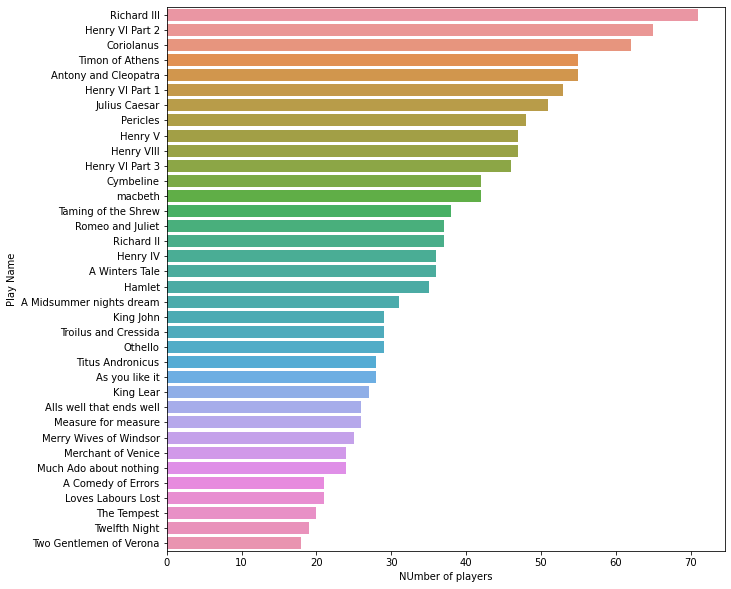

In [36]:
#plotting the number of players for each play
plt.figure(figsize=(10,10))
ax = sns.barplot(x= 'NumPlayers',y='Play',data=number_players )
ax.set(xlabel="NUmber of players", ylabel='Play Name')
#play_data.index= np.arange(0,len(numberPlayers)))
plt.show()

In [37]:
full_text = "\n".join(all_data.PlayerLine)
print(len(full_text))

4165663


In [38]:
from transformers import pipeline

In [41]:
sample_lines = all_data['PlayerLine'].sample(100)

In [45]:
# selection of a random sample of 100 lines
samples = sample_lines.tolist()
samples

['And in her bosom Ill unclasp my heart',
 'And after many scorns many foul taunts',
 'So is she heir of Naples twixt which regions',
 'The lady that I sent for Welcome fair one',
 'Great Duke of Lancaster I come to thee',
 'a youth is not for me and he that is less than a',
 'Well my dread lord so must I call you now',
 'Being so far provoked as I was in France I would',
 'When I did first impart my love to you',
 'Now my lord what shall we do if we perceive',
 'And now dear maid be you as free to us',
 'Sirrah Jack thy horse stands behind the hedge',
 'Towards which advance the war',
 'Because thou art not seen',
 'Who has a book of all that monarchs do',
 'What hath he said',
 'Noble Timon',
 'And what a terror he had been to France',
 'No no no man saw em',
 'That sucks the nurse asleep',
 'confess it brokenly with your English tongue Do',
 'The fortune of the day quite turnd from him',
 'Forswear not thyself sweet youth for I am not',
 'Enter GLOUCESTER brought in by two or three'

In [46]:
#sentiment analysis
sentiment = pipeline(task = 'sentiment-analysis')
results = sentiment(samples)

In [49]:
#convert into dataframe
sentiment_results = pd.DataFrame(results)
sentiment_results.head()

,label,score
0,NEGATIVE,0.991052
1,NEGATIVE,0.998079
2,POSITIVE,0.628946
3,POSITIVE,0.996722
4,POSITIVE,0.999561


In [51]:
pd.value_counts(sentiment_results['label'])

NEGATIVE    50
POSITIVE    50
Name: label, dtype: int64

<AxesSubplot:>

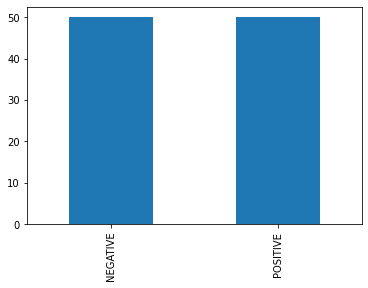

In [50]:
#PLOTTING values of the sentiment analysis
pd.value_counts(sentiment_results['label']).plot.bar()